# 起動・ライブラリの準備

## ライブラリのインポート

In [1]:
# 配列計算ライブラリ NumPy
import numpy as np

# 画像表示用関数
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

# tf.Kerasのディープラーニング用クラス
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import utils

# tf.Kerasに入っているMnistデータ
from tensorflow.keras.datasets import mnist

# データの準備・加工

## データセットの読み込み

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #★

## 学習用画像を1枚表示

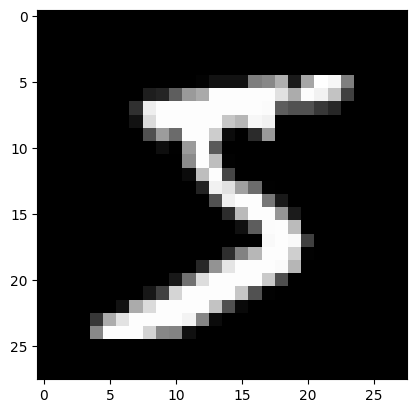

In [3]:
imshow(X_train[0], "gray") #★

## 学習用正解ラベルを1つ表示

In [4]:
print(y_train[0]) #★

5


## 変数の構造を確認

In [5]:
print(X_train.shape) #★

(60000, 28, 28)


## 画像の実際の内容を確認

In [6]:
print(X_train[0]) #★

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## 前処理１：画像を一次元の配列に変形

In [7]:
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

## 前処理２：画素の正規化

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

## 前処理３：正解ラベルのOne-Hotエンコーディング

In [9]:
print(y_train) #★現在のラベルを表示

[5 0 4 ... 5 6 8]


In [10]:
#★One-Hotエンコーディング
y_train_label = utils.to_categorical(y_train)
y_test_label = utils.to_categorical(y_test)

In [11]:
#★結果を表示
print(y_train_label)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# 学習方法の決定

## ニューラルネットワークモデルを構築

In [12]:
def build_multilayer_perceptron():
    model = Sequential()

    model.add(Dense(512, input_shape=(784,)))
    model.add(Activation('relu'))
    #model.add(Dense(256))
    #model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [13]:
model = build_multilayer_perceptron() #★上の関数でモデルを構築

## モデルの構造を確認

In [14]:
model.summary() #★

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## モデルのコンパイル

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              #optimizer=Adam(),
              metrics=['accuracy'])

# 学習

## 学習の実行

In [16]:
history = model.fit(x_train, y_train_label,
                   batch_size=128,
                   epochs=10,
                   verbose=1,
                   validation_data=(x_test, y_test_label))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 1.0896 - accuracy: 0.7611 - val_loss: 0.5969 - val_accuracy: 0.8668
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5203 - accuracy: 0.8741 - val_loss: 0.4325 - val_accuracy: 0.8925
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4199 - accuracy: 0.8915 - val_loss: 0.3730 - val_accuracy: 0.9027
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3741 - accuracy: 0.9003 - val_loss: 0.3415 - val_accuracy: 0.9081
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3463 - accuracy: 0.9056 - val_loss: 0.3190 - val_accuracy: 0.9137
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3263 - accuracy: 0.9100 - val_loss: 0.3030 - val_accuracy: 0.9177
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3105 - accuracy: 0.9144 - val_loss: 0.2917 - val_accuracy: 0.9200
Epoch 

# 予測・評価

## 精度の評価

In [17]:
score = model.evaluate(x_test, y_test_label) #★

313/313 [==============================] - 1s 3ms/step - loss: 0.2621 - accuracy: 0.9268


In [18]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26207777857780457
Test accuracy: 0.926800012588501


## 実際の予測

In [19]:
predicts = model.predict(x_test).argmax(axis=-1) #★

313/313 [==============================] - 1s 3ms/step


predict label is 7
label is 7


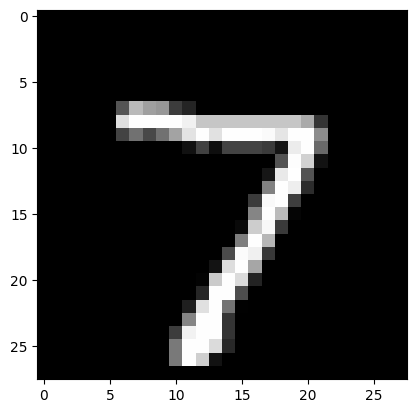

In [20]:
#★ X_test, y_test, predictsの最初の要素[0]を表示
print(f"predict label is {predicts[0]}")
print(f"label is {y_test[0]}")
imshow(X_test[0], "gray")

## 不正解を取得

In [21]:
wrongs = []
for i, (y,predict) in enumerate(zip(y_test,predicts)):
    if y != predict:
        wrongs.append((i,(y, predict)))
wrongs 

[(8, (5, 6)),
 (33, (4, 6)),
 (77, (2, 7)),
 (92, (9, 4)),
 (124, (7, 4)),
 (149, (2, 9)),
 (193, (9, 3)),
 (217, (6, 5)),
 (233, (8, 7)),
 (241, (9, 8)),
 (245, (3, 6)),
 (247, (4, 2)),
 (259, (6, 0)),
 (290, (8, 4)),
 (300, (4, 1)),
 (313, (3, 5)),
 (318, (2, 3)),
 (320, (9, 7)),
 (321, (2, 7)),
 (340, (5, 3)),
 (341, (6, 4)),
 (352, (5, 0)),
 (362, (2, 7)),
 (380, (0, 5)),
 (403, (8, 9)),
 (435, (8, 7)),
 (444, (2, 8)),
 (445, (6, 0)),
 (448, (9, 8)),
 (449, (3, 5)),
 (464, (3, 7)),
 (468, (7, 2)),
 (478, (5, 8)),
 (479, (9, 3)),
 (502, (5, 3)),
 (507, (3, 5)),
 (511, (4, 8)),
 (531, (3, 6)),
 (536, (2, 1)),
 (543, (8, 3)),
 (551, (7, 1)),
 (553, (8, 6)),
 (565, (4, 9)),
 (569, (3, 5)),
 (578, (3, 8)),
 (582, (8, 2)),
 (591, (8, 3)),
 (605, (7, 9)),
 (610, (4, 6)),
 (613, (2, 8)),
 (619, (1, 8)),
 (628, (3, 9)),
 (629, (2, 6)),
 (638, (5, 7)),
 (659, (2, 9)),
 (684, (7, 3)),
 (689, (7, 9)),
 (691, (8, 4)),
 (707, (4, 9)),
 (717, (0, 6)),
 (720, (5, 8)),
 (728, (2, 8)),
 (738, (2, 8)

## 不正解画像を表示

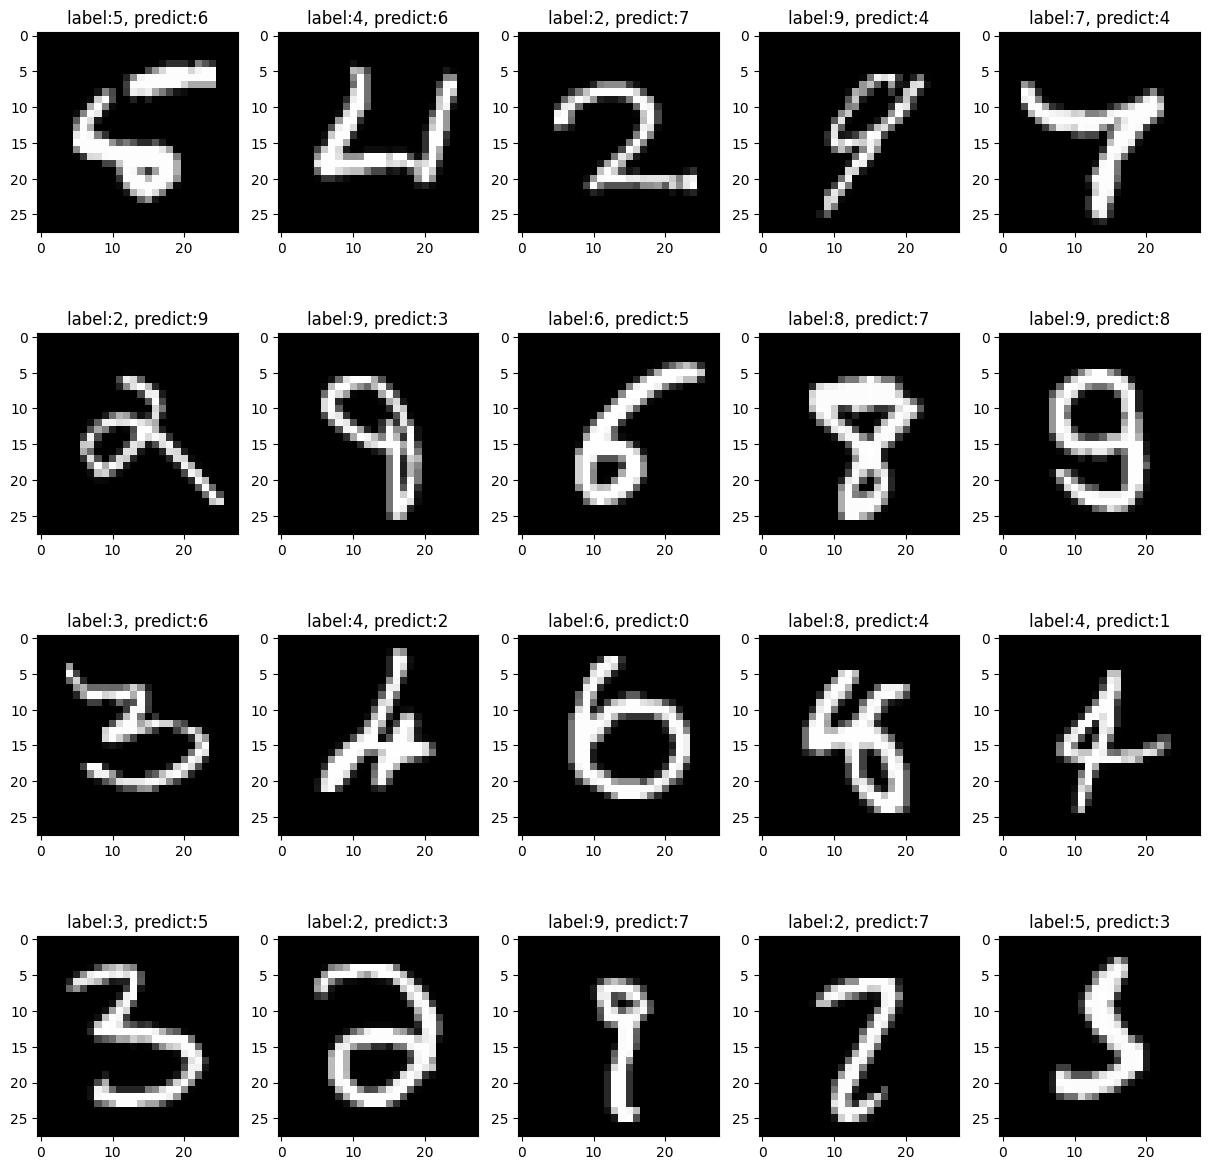

In [22]:
f = plt.figure(figsize=(15,15))
for i ,(index, (label, predict)) in enumerate(wrongs[:20]):
    i += 1
    axes = f.add_subplot(4,5,i)
    axes.set_title(f"label:{label}, predict:{predict}")
    axes.imshow(X_test[index], "gray")

## モデルの保存

In [23]:
model.save("model.keras")